## I) Reading the data

In [51]:
# Author : Martin Thoma 
# URL : https://martin-thoma.com/classify-mnist-with-pybrain/

from struct import unpack
import gzip
from numpy import zeros, uint8, float32

def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

X_train, y_train = get_labeled_data("train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz")
X_test, y_test = get_labeled_data("t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz")


i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


## Mean images

calculaing...
Label: 0


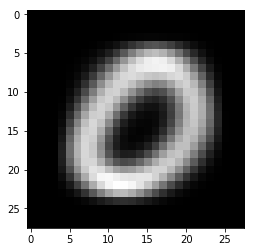

Label: 1


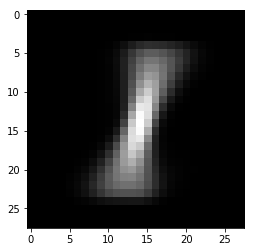

Label: 2


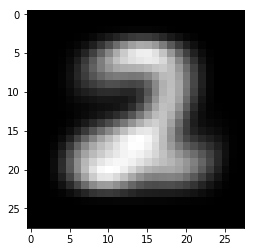

Label: 3


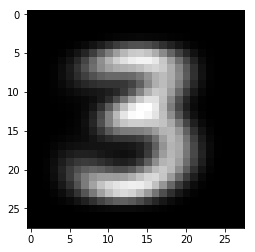

Label: 4


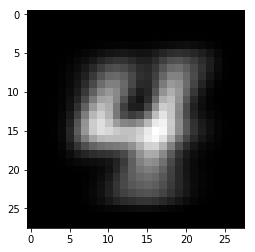

Label: 5


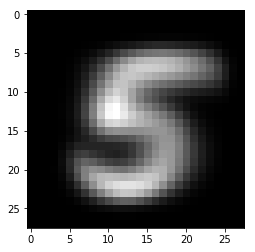

Label: 6


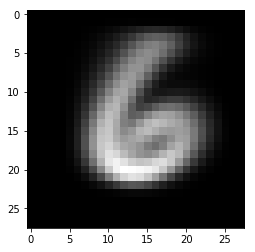

Label: 7


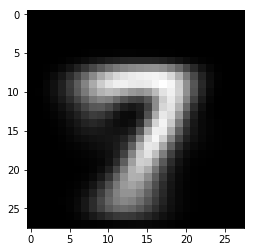

Label: 8


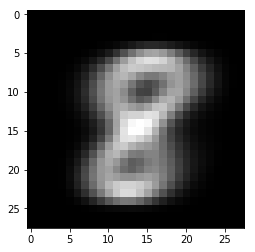

Label: 9


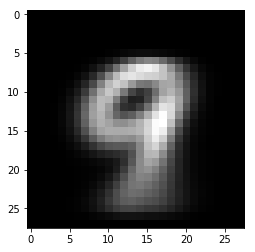

In [52]:
from matplotlib import pylab
from pylab import imshow, show, cm
from scipy.stats import norm
import cv2

def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()

def meanImage(train_set, train_labels):
    # return predicted labels of test set
    
    print("calculaing...")
    size = len(train_set[0])
    # index corresponding to each label 
    dict_train_index = {}
    # probability corresponding to each label
    probability = {}
    for i in range(0, 10):
        dict_train_index[i] = list(np.where(np.asarray(train_labels) == i)[0])
        probability[i] = len(dict_train_index[i])/len(train_labels)
        
#     dataset corresponding to each label
    dict_train_set = {}
    for i in range(0, 10):
        dict_train_set[i] = np.asarray([train_set[j] for j in dict_train_index[i]])  
    
#     mean and var for images' features
    mean_list = np.empty([10,size,size])
    var_list = np.empty([10,size,size])
    for i in range(0, 10):  
        for j in range(0, size):
            for k in range(0, size):
                feature_list = []
                for m in range(0, len(dict_train_set[i])):
                    feature_list.append(dict_train_set[i][m][j][k])
                feature_mean = np.mean(feature_list)
                mean_list[i][j][k] = feature_mean
                feature_var = np.var(feature_list)
                var_list[i][j][k] = feature_var
                
#    view mean image
    for i in range(0, 10):
        view_image(mean_list[i], i)
        
meanImage(X_train, y_train)

## II) Preprocessing the data

In [53]:
import cv2
import numpy as np

def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()

def resize(images):        
    images_resized = []
    for image in images:
        size = len(image)
    
        x_min = 0
        f_break = False
        for x in range(0, size):
            for y in range(0, size):
                if image[y][x]!=0.0:
                    x_min = x   
                    f_break = True
                    break
            if f_break:
                break

        x_max = 28
        f_break = False
        for x in range(size-1,-1,-1):
            for y in range(0, size):
                if image[y][x]!=0.0:
                    x_max = x   
                    f_break = True
                    break
            if f_break:
                break

        y_min = 0
        f_break = False
        for y in range(0, size):
            for x in range(0, size):
                if image[y][x]!=0.0:
                    y_min = y    
                    f_break = True
                    break
            if f_break:
                break

        y_max = 28
        f_break = False
        for y in range(size-1,-1,-1):
            for x in range(0, size):
                if image[y][x]!=0.0:
                    y_max = y    
                    f_break = True
                    break
            if f_break:
                break
                
        temp_image = image[y_min: y_max+1]
        new_image =  []  
        for i in range(0, len(temp_image)):
             new_image.append(temp_image[i][x_min: x_max])
        final_image = cv2.resize(np.asarray(new_image),(20,20))
        images_resized.append(final_image)
        #view_image(final_image, label="")
    return images_resized

# Threshold the data
def thresholding(X):
    for x in X:
        for i in range(len(x)):
            for j in range(len(x[i])):
                if x[i, j] > 127:
                    x[i, j] = 1.
                else:
                     x[i, j] = 0

# Flatten the 28 x 28 matrix corresponding to an image to a 1 x 784 vector 
def flatten(X):
    tmp = []
    for x in range(len(X)):
        tmp.append([X[x][i, j] for i in range(X[x].shape[0]) for j in range(X[x].shape[1])])
    return tmp    

#print X_train[0]

# Resized versions of the images
print "Resizing..."
X_train_resized = resize(X_train)
X_test_resized = resize(X_test)

# Threshold the untouched and resized images
print "Thresholding..."
thresholding(X_train)
thresholding(X_test)
thresholding(X_train_resized)
thresholding(X_test_resized)

# Flatten the images into 1 x 784 vectors
print "Flattenning..."
X_train_preprocessed = flatten(X_train)
X_test_preprocessed = flatten(X_test)
X_train_preprocessed_resized = flatten(X_train_resized)
X_test_preprocessed_resized = flatten(X_test_resized)
print "Preprocessing finished"
#print X_train_preprocessed[0]

Resizing...
Thresholding...
Flattenning...
Preprocessing finished


## Prediction with Normal Model 

In [58]:
import math
import pandas as pd

# Seperate data in two data frames one for each class (0 to 9)
def seperate_by_class(X, y):
    classes = []
    for i in range(10):
        classes.append(X[y == i])
    return classes

# Compute mean of elements
def mean(elements):
    return float(sum(elements)) / float(len(elements))

# Standard deviation mean of elements
def standard_deviation(elements):
    m = mean(elements)
    var = sum([math.pow(e - m, 2) for e in elements]) / float(len(elements) - 1)
    return math.sqrt(var)

# Compute Mean and Std_Dev of each attribute for each class
def statistics_normal(X, y):
    classes_statistics = []
    classes = seperate_by_class(X, y)
    for c in classes:
        attribute_stats = [(mean(c[column]), standard_deviation(c[column])) for column in c]
        classes_statistics.append(attribute_stats)
    return classes_statistics

def normal(mean, std_dev, x):
    n = math.exp(-0.5 * math.pow((x - mean) / std_dev, 2)) / (math.sqrt(2 * math.pi) * std_dev) 
    if n == 0:
        return 1e-15
    else:
        return n     

def predict_normal(x, classes_statistics, p_y_i):
    p_classes = [math.log(p_y_i[i]) for i in range(10)]
    for j in range(10): # iterate on the 10 possible labels
        for i in range(len(x)): # iterate on the features of the vector
            mean = classes_statistics[j][i][0]
            std_dev = classes_statistics[j][i][1]
            if std_dev != 0: # must not have null standard deviation nor mean
                p_classes[j] += math.log(normal(mean, std_dev, x[i]))
    return p_classes.index(max(p_classes))

def compute_accuracy_normal(X_test, y_test, y_train, classes_statistics):
    accuracy = 0
    p_y_i = [float((y_train == i).sum()) / float(len(y_train)) for i in range(10)]
    for i, x in X_test.iterrows():
        if predict_normal(x, classes_statistics, p_y_i) == y_test[i]:
            accuracy += 1
    accuracy = accuracy / float(len(y_test))
    return accuracy

# Untouched images
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
classes_statistics_normal = statistics_normal(X_train_preprocessed, y_train)
normal_accuracy_test = compute_accuracy_normal(X_test_preprocessed, y_test, y_train, classes_statistics_normal)
normal_accuracy_train = compute_accuracy_normal(X_train_preprocessed, y_train, y_train, classes_statistics_normal)
print "Untouched images normal distribution accuracy test set " + str(normal_accuracy_test)
print "Untouched images normal distribution accuracy train set " + str(normal_accuracy_train)

# Resized images
X_train_preprocessed_resized = pd.DataFrame(X_train_preprocessed_resized)
X_test_preprocessed_resized = pd.DataFrame(X_test_preprocessed_resized)
classes_statistics_normal_resized = statistics_normal(X_train_preprocessed_resized, y_train)
normal_accuracy_resized_test = compute_accuracy_normal(X_test_preprocessed_resized, y_test, y_train, classes_statistics_normal_resized)
normal_accuracy_resized_train = compute_accuracy_normal(X_train_preprocessed_resized, y_train, y_train, classes_statistics_normal_resized)
print "Resized images normal distribution accuracy test set " + str(normal_accuracy_resized_test)
print "Resized images normal distribution accuracy train set " + str(normal_accuracy_resized_train)


Untouched images normal distribution accuracy test set 0.7806
Untouched images normal distribution accuracy train set 0.773983333333
Resized images normal distribution accuracy test set 0.8199
Resized images normal distribution accuracy train set 0.80905


## Prediction with Bernouilli distribution

In [59]:
# Seperate data in two data frames one for each class (0 to 9)
def seperate_by_class(X, y):
    classes = []
    for i in range(10):
        classes.append(X[y == i])
    return classes

# Compute probability of value 0 or 255 for each attribute for each class
def statistics_bernouilli(X, y):
    classes_statistics = []
    classes = seperate_by_class(X, y)
    for c in classes:
        attribute_stats = []
        for column in c:
            p_0 = np.count_nonzero(c[column] == 0) / float(len(c[column]))
            attribute_stats.append((p_0, 1-p_0))
        classes_statistics.append(attribute_stats)
    return classes_statistics

def bernouilli(p):
    if p == 0:
        return 1e-15
    else:
        return p

def predict_bernouilli(x, classes_statistics, p_y_i):
    p_classes = [math.log(p_y_i[i]) for i in range(10)]
    for c in range(10): # iterate on the 10 possible labels
        for feature in range(len(x)): # iterate on the features of the vector
            p_classes[c] += math.log(bernouilli(classes_statistics[c][feature][int(x[feature])]))
    return p_classes.index(max(p_classes))

def compute_accuracy_bernouilli(X_test, y_test, y_train, classes_statistics):
    accuracy = 0
    p_y_i = [float((y_train == i).sum()) / float(len(y_train)) for i in range(10)]
    for i, x in X_test.iterrows():
        if predict_bernouilli(x, classes_statistics, p_y_i) == y_test[i]:
            accuracy += 1
    accuracy = accuracy / float(len(y_test))
    return accuracy

# Untouched images
classes_statistics_bernouilli = statistics_bernouilli(X_train_preprocessed, y_train)
bernouilli_accuracy_test = compute_accuracy_bernouilli(X_test_preprocessed, y_test, y_train, classes_statistics_bernouilli)
bernouilli_accuracy_train = compute_accuracy_bernouilli(X_train_preprocessed, y_train, y_train, classes_statistics_bernouilli)
print "Untouched bernouilli accuracy test set " + str(bernouilli_accuracy_test)
print "Untouched bernouilli accuracy train set " + str(bernouilli_accuracy_train)

# Resized images
classes_statistics_bernouilli_resized = statistics_bernouilli(X_train_preprocessed_resized, y_train)
bernouilli_accuracy_resized_test = compute_accuracy_bernouilli(X_test_preprocessed_resized, y_test, y_train, classes_statistics_bernouilli_resized)
bernouilli_accuracy_resized_train = compute_accuracy_bernouilli(X_train_preprocessed_resized, y_train, y_train, classes_statistics_bernouilli_resized)
print "Resized bernouilli accuracy test set " + str(bernouilli_accuracy_resized_test)
print "Resized bernouilli accuracy train set " + str(bernouilli_accuracy_resized_train)

Untouched bernouilli accuracy test set 0.8439
Untouched bernouilli accuracy train set 0.838283333333
Resized bernouilli accuracy test set 0.8345
Resized bernouilli accuracy train set 0.821533333333
